In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [ ]:
desc = df[["tenure", "MonthlyCharges", "TotalCharges"]].describe()
display(desc)

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
tenure_mean = df["tenure"].mean()
tenure_median = df["tenure"].median()
monthly_charges_mean = df["MonthlyCharges"].mean()
monthly_charges_median = df["MonthlyCharges"].median()
total_charges_mean = df["TotalCharges"].mean()
total_charges_median = df["TotalCharges"].median()

print(f'Tenure - media: {tenure_mean} mediana: {tenure_median}')
print(f'Monthly Charges - media: {monthly_charges_mean} mediana: {monthly_charges_median}')
print(f'Total Charges - media: {total_charges_mean} mediana: {total_charges_median}')

Tenure - media: 32.37114865824223 mediana: 29.0
Monthly Charges - media: 64.76169246059918 mediana: 70.35
Total Charges - media: 2283.3004408418656 mediana: 1397.475


En promedio, un cliente se queda en la empresa menos de 32.8 meses ya que la mediana es de 29 meses. Esto se puede deber por posibles outliers o los clientes que se quedan más tiempo jalan el promedio hacia arriba.

En total charges hay una gran diferencia entre media y mediana. Puede que algunos clientes tengan un total charges muy elevado, que eleva el valor de la media.

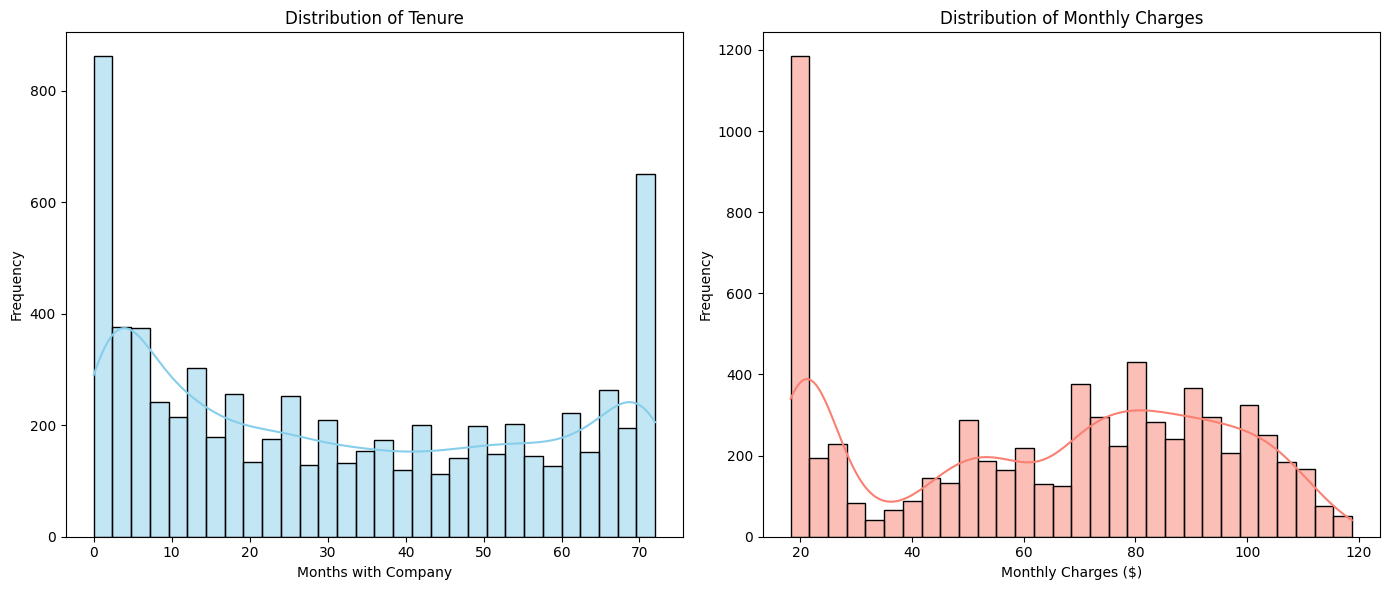

In [ ]:
plt.figure(figsize=(14,6))

# Tenure
plt.subplot(1,2,1)
sns.histplot(df["tenure"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Tenure")
plt.xlabel("Months with Company")
plt.ylabel("Frequency")

# MonthlyCharges
plt.subplot(1,2,2)
sns.histplot(df["MonthlyCharges"], bins=30, kde=True, color="salmon")
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

En tenure, hay renovaciones anuales y por eso hay picos en meses múltiplos de 12. Muchos clientes que duran poco. Se pueden buscar estrategias para no perder clientes nuevos tan rápido.

La distribución de los cargos mensuales tiene un pico en 20. Hay muchos que pagan lo más básico posible.

In [ ]:
# Agrupar por Churn y calcular medianas
median_values = df.groupby("Churn")[["tenure", "MonthlyCharges"]].median()
print(median_values)

       tenure  MonthlyCharges
Churn                        
No       38.0          64.425
Yes      10.0          79.650


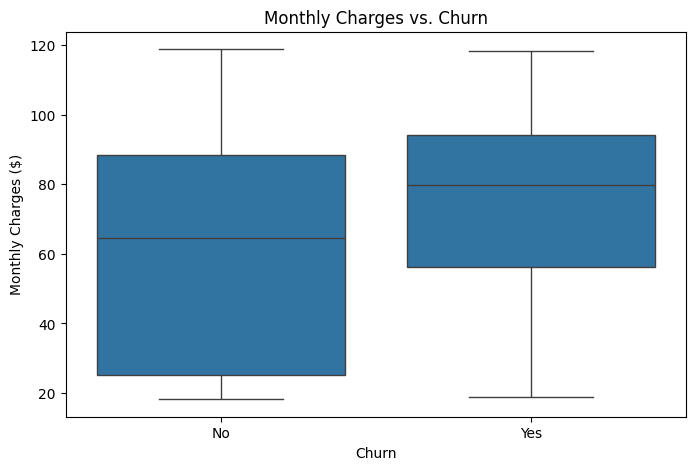

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs. Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges ($)")
plt.show()

A los clientes que les cobran más se quedan menos tiempo en la empresa.